# Data Mining project
## 5_fieldsAnalysis - correct to consistent

In this notebook we will analysis and improve consistency of dataset fields

In [55]:
import os
import os.path
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from colorama import Fore

In [4]:
pathori = "../Data/Raw/Main/"
pathtemp = "../Data/Interim/"
pathdest = "../Data/Processed/"
filetemp = "main_competitions.csv"
filedest = "main_competitions.csv"

In [5]:
# Open dataset
url = pathtemp + filetemp
parse_dates=["Date"]
ds = pd.read_csv(url, parse_dates=parse_dates, index_col=False)

In [6]:
print("Shape: ", ds.shape)
print("Columns: ", ds.columns)
print("Shample data:")
display(ds.head(5))

Shape:  (105503, 20)
Columns:  Index(['Country', 'Competition', 'Season', 'Div', 'Date', 'HomeTeam',
       'AwayTeam', 'FTR', 'WHH', 'WHD', 'WHA', 'SBH', 'SBD', 'SBA', 'IWH',
       'IWD', 'IWA', 'GBH', 'GBD', 'GBA'],
      dtype='object')
Shample data:


,Country,Competition,Season,Div,Date,HomeTeam,AwayTeam,FTR,WHH,WHD,WHA,SBH,SBD,SBA,IWH,IWD,IWA,GBH,GBD,GBA
0,Belgium,JupilerLeague,2003-2004,B1,2003-08-08,Club Brugge,Genk,H,NaN,NaN,NaN,1.44,3.75,6.50,1.45,3.8,5.4,1.40,3.80,6.85
1,Belgium,JupilerLeague,2003-2004,B1,2003-09-08,Anderlecht,Antwerp,H,1.22,5.0,9.5,1.20,5.50,10.00,1.30,4.2,8.0,1.20,5.50,9.25
2,Belgium,JupilerLeague,2003-2004,B1,2003-09-08,Charleroi,Lierse,A,2.50,3.4,2.3,2.62,3.40,2.25,2.90,3.2,2.1,2.50,3.35,2.35
3,Belgium,JupilerLeague,2003-2004,B1,2003-09-08,Germinal,Bergen,H,1.90,3.5,3.2,1.90,3.40,3.40,1.90,3.4,3.2,1.85,3.35,3.50
4,Belgium,JupilerLeague,2003-2004,B1,2003-09-08,Lokeren,St Truiden,D,1.66,3.6,4.0,1.72,3.50,4.00,1.90,3.4,3.2,1.80,3.40,3.65


In [6]:
# Detect rows with nulls
ds_nan = ds.loc[ds.isnull().any(axis=1)]
print ('Rows with nulls: ',ds_nan.shape[0])
display(ds_nan.sample(5))

Rows with nulls:  52031


,Country,Competition,Season,Div,Date,HomeTeam,AwayTeam,FTR,WHH,WHD,WHA,SBH,SBD,SBA,IWH,IWD,IWA,GBH,GBD,GBA
31062,England,League2,2014-2015,E3,2015-03-03,Northampton,Portsmouth,H,2.25,3.3,3.2,NaN,NaN,NaN,2.10,3.1,3.00,NaN,NaN,NaN
84074,Scotland,Division2,2014-2015,SC2,2015-03-28,Dunfermline,Morton,A,2.60,3.4,2.6,NaN,NaN,NaN,2.45,3.2,2.55,NaN,NaN,NaN
2563,Belgium,JupilerLeague,2013-2014,B1,2013-10-31,Standard,Waasland-Beveren,D,1.18,6.0,13.0,NaN,NaN,NaN,1.22,5.0,10.00,NaN,NaN,NaN
16267,England,Conference,2013-2014,EC,2014-01-02,Chester,Welling United,A,2.30,3.2,3.2,NaN,NaN,NaN,2.20,3.1,2.80,NaN,NaN,NaN
86767,Scotland,Division3,2016-2017,SC3,2017-01-14,Arbroath,Berwick,H,1.67,3.8,5.0,NaN,NaN,NaN,1.65,3.7,4.35,NaN,NaN,NaN


In [7]:
# Detect columns with nulls
ds.isnull().sum()

Country            0
Competition        0
Season             0
Div              145
Date             145
HomeTeam         385
AwayTeam         385
FTR              146
WHH             2701
WHD             2701
WHA             2701
SBH            48992
SBD            48991
SBA            48991
IWH             1556
IWD             1556
IWA             1560
GBH            41066
GBD            41066
GBA            41066
dtype: int64

In [8]:
dsdate_null = ds.loc[ds['Date'].isnull()]
print('Date: ', dsdate_null.shape[0])
display(dsdate_null.head(5))

Date:  145


,Country,Competition,Season,Div,Date,HomeTeam,AwayTeam,FTR,WHH,WHD,WHA,SBH,SBD,SBA,IWH,IWD,IWA,GBH,GBD,GBA
9820,England,Championship,2014-2015,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16477,England,Conference,2013-2014,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16478,England,Conference,2013-2014,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16479,England,Conference,2013-2014,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17032,England,Conference,2014-2015,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Delete date null rows
ds.dropna(subset=['Date'], how='all',inplace=True)

In [10]:
ds_null = ds.loc[ds['HomeTeam'].isnull()]
print('Home Team null: ', ds_null.shape[0])
ds_null.sample(5)

Home Team null:  240


,Country,Competition,Season,Div,Date,HomeTeam,AwayTeam,FTR,WHH,WHD,WHA,SBH,SBD,SBA,IWH,IWD,IWA,GBH,GBD,GBA
57193,Greece,EthnikiKatigoria,2003-2004,G1,2004-02-05,NaN,NaN,H,2.25,3.1,2.8,2.25,3.10,2.8,2.35,3.0,2.35,2.20,3.10,2.70
57094,Greece,EthnikiKatigoria,2003-2004,G1,2004-11-01,NaN,NaN,H,NaN,NaN,NaN,1.40,3.75,6.5,1.45,3.4,5.40,1.50,3.45,5.75
57163,Greece,EthnikiKatigoria,2003-2004,G1,2004-03-04,NaN,NaN,D,NaN,NaN,NaN,2.00,3.10,3.3,2.10,2.9,3.20,2.00,3.00,3.30
57012,Greece,EthnikiKatigoria,2003-2004,G1,2003-04-10,NaN,NaN,D,1.25,4.7,8.0,1.30,4.33,8.0,1.30,4.0,7.00,1.35,4.00,7.30
57079,Greece,EthnikiKatigoria,2003-2004,G1,2003-12-14,NaN,NaN,H,NaN,NaN,NaN,1.08,7.50,15.0,1.05,6.5,14.00,1.08,7.00,16.00


In [11]:
# Delete date null rows
ds.dropna(subset=['HomeTeam'], how='all',inplace=True)

In [12]:
ds_null = ds.loc[ds['WHH'].isnull()]
print('WHH null: ', ds_null.shape[0])
ds_null.sample(5)

WHH null:  2381


,Country,Competition,Season,Div,Date,HomeTeam,AwayTeam,FTR,WHH,WHD,WHA,SBH,SBD,SBA,IWH,IWD,IWA,GBH,GBD,GBA
41894,France,Division2,2015-2016,F2,2015-08-08,Lens,Red Star,D,NaN,NaN,NaN,NaN,NaN,NaN,2.2,2.8,3.30,NaN,NaN,NaN
60107,Greece,EthnikiKatigoria,2016-2017,G1,2016-05-11,Levadeiakos,Xanthi,D,NaN,NaN,NaN,NaN,NaN,NaN,2.5,2.9,2.95,NaN,NaN,NaN
53599,Germany,Liga2,2007-2008,D2,2007-10-21,Erzgebirge Aue,Augsburg,H,NaN,NaN,NaN,2.35,3.2,2.75,2.2,3.2,2.90,2.25,3.2,2.9
44367,France,LeChampionnat,2007-2008,F1,2007-10-20,Rennes,Le Mans,H,NaN,NaN,NaN,2.00,3.0,3.75,1.9,3.0,4.00,1.95,3.0,4.0
59640,Greece,EthnikiKatigoria,2014-2015,G1,2015-05-02,Niki Volos,Panathinaikos,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
ds.isnull().sum()

Country            0
Competition        0
Season             0
Div                0
Date               0
HomeTeam           0
AwayTeam           0
FTR                1
WHH             2381
WHD             2381
WHA             2381
SBH            48821
SBD            48820
SBA            48820
IWH             1376
IWD             1376
IWA             1380
GBH            40904
GBD            40904
GBA            40904
dtype: int64

In [17]:
# Detect duplicated Countries
ds['Country'].value_counts()

England        34309
Italy          11106
Spain          11064
Scotland       10720
France         10470
Germany         8424
Turkey          4331
Netherlands     4059
Belgium         3748
Portugal        3579
Greece          3308
Name: Country, dtype: int64

In [21]:
# Detect duplicated Competitions
ds['Competition'].value_counts().sort_index()

Championship        7896
Conference          6679
Division1           2566
Division2           7800
Division3           2385
Eredivisie          4059
EthnikiKatigoria    3308
FutbolLigi1         4331
JupilerLeague       3748
LeChampionnat       5420
League1             7352
League2             7352
Liga1               7935
Liga2               4068
Premier             8049
Primera             5410
Segunda             5654
SerieA              5029
SerieB              6077
Name: Competition, dtype: int64

In [22]:
# Detect duplicated seasons
ds['Season'].value_counts().sort_index()
# Best initial season: 2005-2006

2003-2004    2210
2004-2005    1858
2005-2006    7786
2006-2007    7504
2007-2008    6422
2008-2009    7810
2009-2010    7634
2010-2011    7744
2011-2012    7744
2012-2013    7744
2013-2014    7810
2014-2015    7876
2015-2016    7810
2016-2017    7258
2017-2018    7810
2018-2019    2098
Name: Season, dtype: int64

In [46]:
teams = ds['HomeTeam']
teams = teams.append(ds['AwayTeam'])
teams = teams.value_counts().index.sort_values()
display(teams)

Index(['A. Sebatspor', 'AEK', 'AFC Telford United', 'AFC Wimbledon',
       'AZ Alkmaar', 'Aachen', 'Aalen', 'Aberdeen', 'Academica', 'Accrington',
       ...
       'Wrexham', 'Wurzburger Kickers', 'Wycombe', 'Xanthi', 'Xerez',
       'Yeni Malatyaspor', 'Yeovil', 'York', 'Zaragoza', 'Zwolle'],
      dtype='object', length=631)

In [47]:
import difflib as dfl

row1 = ''
for row2 in teams:
    dif = dfl.SequenceMatcher(None, row1, row2).ratio()
    if dif > 0.8:
        print ("'",row1,"'", "-", "'",row2,"'", ": ", str(dif))
    row1 = row2
# 13 repetitions

' Ath Bilbao ' - ' Ath Bilbao B ' :  0.9090909090909091
' Barcelona ' - ' Barcelona B ' :  0.9
' Heracles ' - ' Hercules ' :  0.875
' Malaga ' - ' Malaga B ' :  0.8571428571428571
' Real Madrid ' - ' Real Madrid B ' :  0.9166666666666666
' Sevilla ' - ' Sevilla B ' :  0.875
' Villarreal ' - ' Villarreal B ' :  0.9090909090909091


In [24]:
# Correct spaces
ds['HomeTeam'] = ds['HomeTeam'].str.strip()
ds['AwayTeam'] = ds['AwayTeam'].str.strip()
# Correct bad name
ds = ds.replace('Norwich', 'Northwich')

In [5]:
ds.describe()
# All columns has ranges of values similars and expected

,WHH,WHD,WHA,SBH,SBD,SBA,IWH,IWD,IWA,GBH,GBD,GBA
count,102802.000000,102802.000000,102802.000000,56511.000000,56512.000000,56512.000000,103947.000000,103947.000000,103943.000000,64437.000000,64437.000000,64437.000000
mean,2.395332,3.464835,3.933207,2.302117,3.411661,3.935298,2.323088,3.377620,3.721802,2.311443,3.411856,3.907455
std,1.252241,0.730167,2.575264,1.083365,0.613919,2.293527,1.105036,0.648825,2.212214,1.071491,0.614610,2.223692
min,1.010000,1.020000,1.020000,1.020000,1.200000,1.020000,1.010000,1.500000,1.030000,1.040000,1.250000,1.060000
25%,1.800000,3.100000,2.620000,1.730000,3.200000,2.600000,1.750000,3.100000,2.550000,1.750000,3.200000,2.600000
50%,2.150000,3.300000,3.250000,2.100000,3.250000,3.250000,2.100000,3.200000,3.150000,2.100000,3.250000,3.300000
75%,2.600000,3.500000,4.330000,2.500000,3.500000,4.500000,2.500000,3.400000,4.200000,2.500000,3.500000,4.500000
max,26.000000,17.000000,51.000000,26.000000,13.000000,34.000000,25.000000,16.000000,70.000000,24.000000,11.000000,34.000000


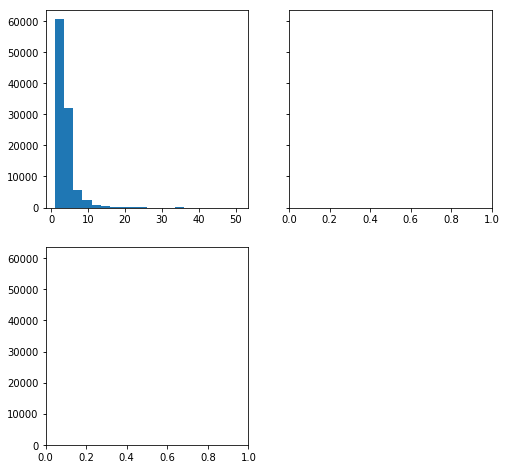

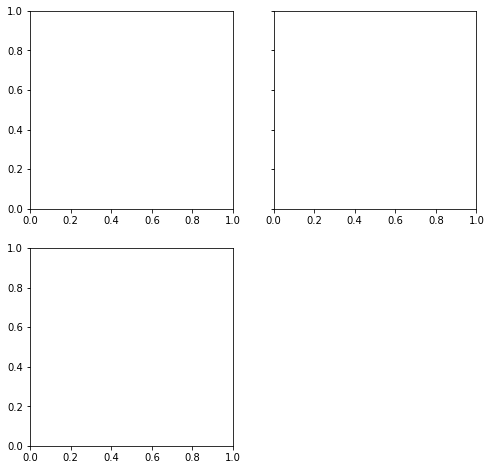

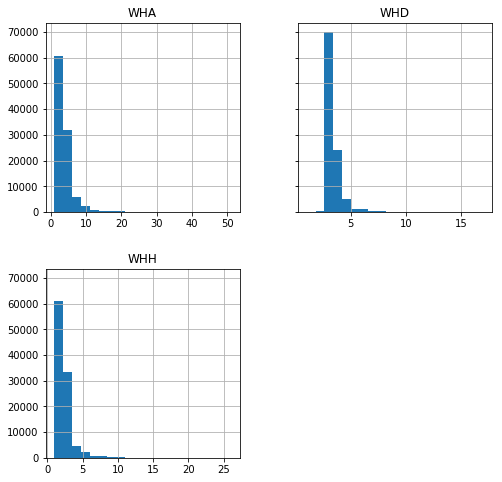

In [79]:
cols = ['WHH','WHD','WHA']
colors = ['#E69F00', '#56B4E9', '#F0E442']
ds.hist(cols, figsize=(8,8),bins=20,sharey=True,label=cols)
plt.show()

In [14]:
if os.path.exists(pathdest + filedest):
    os.remove(pathdest + filedest)
    
ds.to_csv(pathdest + filedest, index=None)